In [1]:
import pandas as pd
import numpy as np

In [2]:
data =pd.read_csv("C:\\Users\\aadit\\Downloads\\playground-series-s3e8\\train.csv")

In [3]:
## reading the first few lines of the data

data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:
Price if Diamond

In [4]:
data1=data.copy()

In [5]:
data1['cut'].value_counts(normalize=True)*100

cut
Ideal        47.761826
Premium      25.783555
Very Good    19.406632
Good          6.003936
Fair          1.044051
Name: proportion, dtype: float64

In [6]:
data1.shape

(193573, 11)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
data1.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
data1.sample(n=10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
71375,71375,0.74,Ideal,G,SI1,61.8,56.0,5.85,5.80,3.59,2893
72290,72290,0.72,Ideal,E,VVS2,61.7,56.0,5.73,5.81,3.57,4129
151486,151486,1.54,Ideal,G,VVS2,62.3,56.0,7.40,7.35,4.60,16547
55821,55821,0.32,Very Good,H,VS2,61.6,57.0,4.37,4.39,2.70,505
163406,163406,0.24,Very Good,F,VVS2,61.8,54.0,3.98,4.02,2.48,478
76424,76424,0.50,Premium,D,SI2,62.2,59.0,5.09,5.06,3.16,1178
123493,123493,1.03,Ideal,G,IF,61.5,55.0,6.50,6.54,4.01,7885
170113,170113,0.42,Very Good,D,VVS2,62.5,58.0,4.80,4.82,3.00,1321
119083,119083,0.39,Premium,F,IF,59.0,58.0,4.75,4.78,2.81,1157
173347,173347,0.30,Ideal,G,VVS1,62.6,56.0,4.31,4.27,2.68,868


In [10]:
data1.duplicated().sum()

0

In [11]:
data1.size

2129303

In [12]:
data1.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [13]:
# id column is not beneficial 

data1.drop(columns='id',axis=1,inplace=True)

In [14]:
data1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [15]:
data1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
data1.select_dtypes('object')

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [17]:
cat_columns=data1.columns[data1.dtypes=='object']

In [18]:
num_columns=data1.columns[data1.dtypes!='object']

In [19]:
data1[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
 6   price   193573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 10.3 MB


In [20]:
data1[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      193573 non-null  object
 1   color    193573 non-null  object
 2   clarity  193573 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [21]:
data1[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [22]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [23]:
for col in cat_columns:
    print(data1[col].value_counts())
    print(f"Here is the total count {len(data1[col].value_counts())}")
    print("========================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Here is the total count 5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Here is the total count 7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
Here is the total count 8


In [24]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

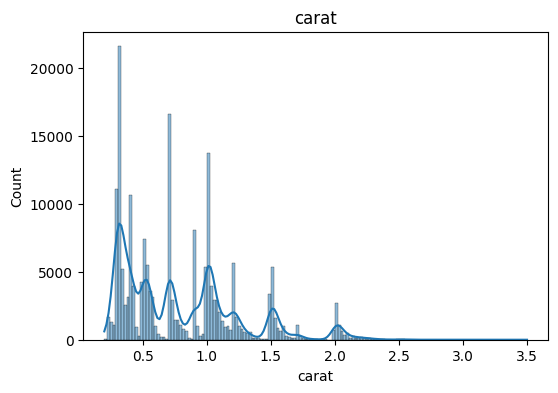

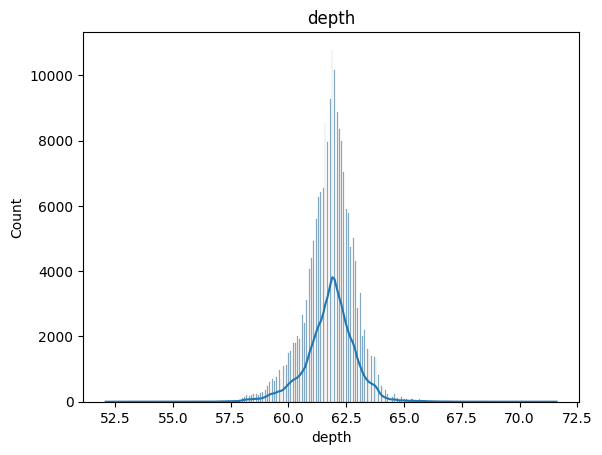

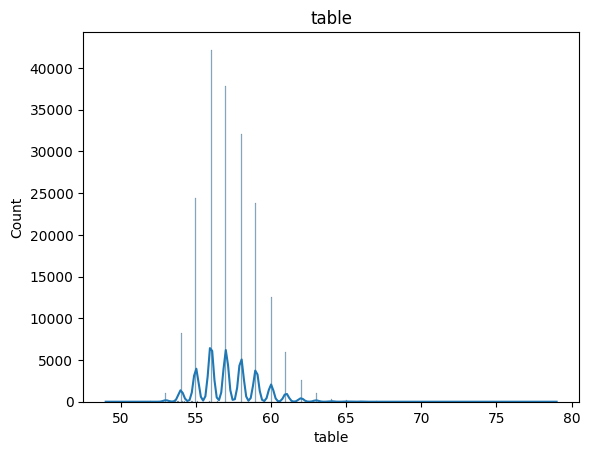

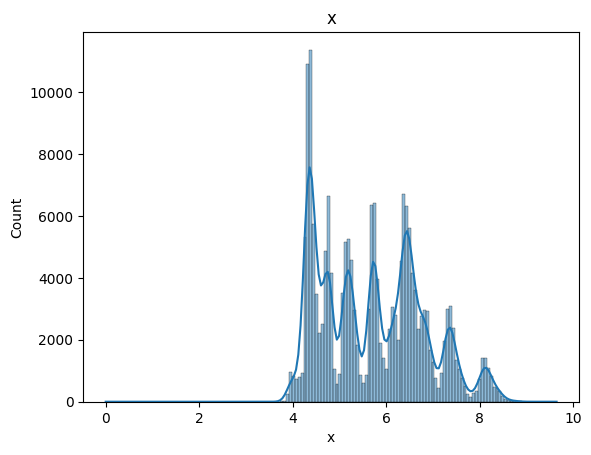

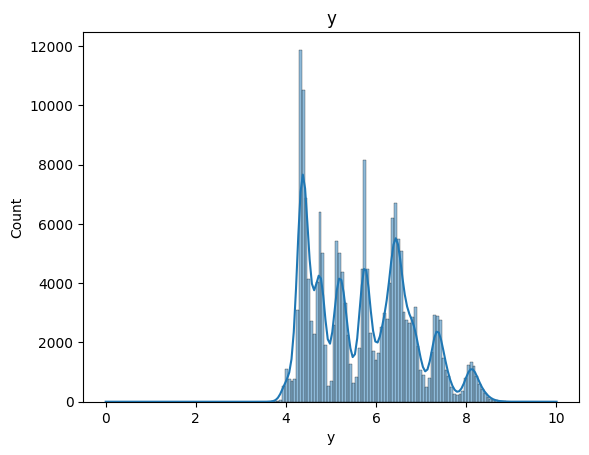

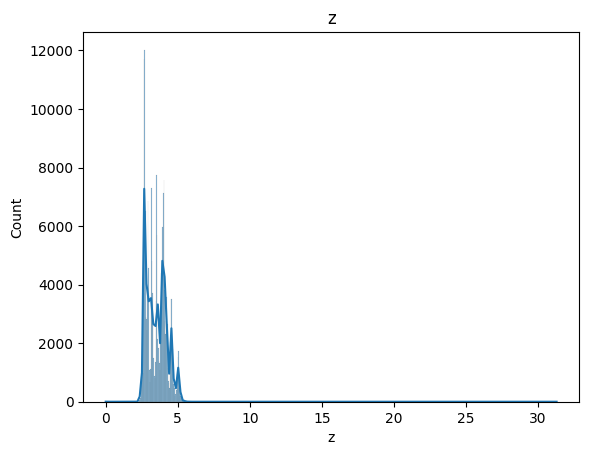

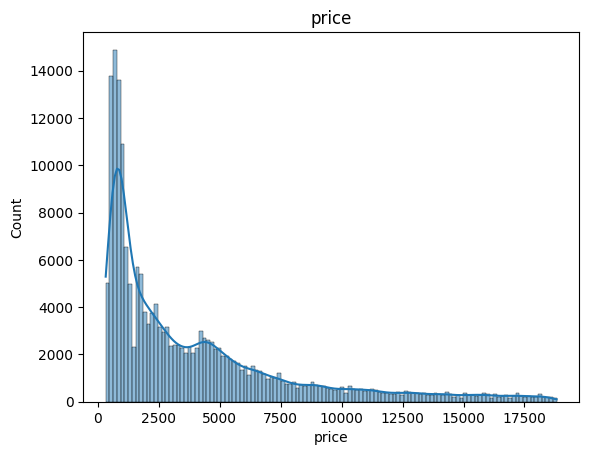

In [27]:
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data1,x=col,kde=True)
    print('\n')
    plt.title(col)
    plt.show()

<Axes: >

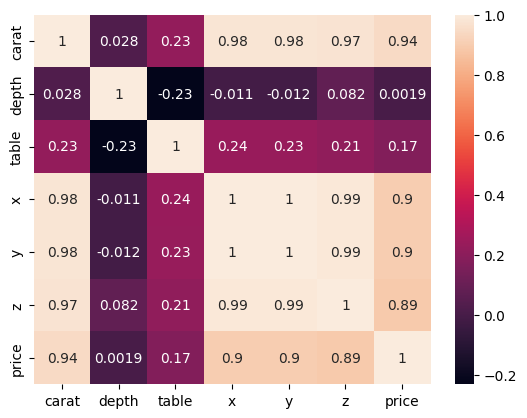

In [28]:
sns.heatmap(data1[num_columns].corr(),annot=True)

In [29]:
## We will do ordinal encoding

In [30]:
data1[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [31]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}


In [32]:
data1['cut']=data1['cut'].map(cut_map)
data1['clarity']=data1['clarity'].map(clarity_map)
data1['color']=data1['color'].map(color_map)

In [33]:
data1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [34]:
data1[cat_columns]

,cut,color,clarity
0,4,3,4
1,3,7,2
2,5,4,5
3,5,4,5
4,4,4,4
...,...,...,...
193568,5,1,6
193569,4,4,6
193570,3,3,3
193571,3,1,3


In [35]:
data1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [36]:
## Model creation

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [38]:
X = data.drop(columns=['price','id'],axis=1)

y = data['price']

In [39]:
X


,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [40]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [41]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [42]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [43]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [44]:
cut_categories=["Fair","Good","Very Good","Premium","Ideal"]
clarity_categories=["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
color_categories=["D","E","F","G","H","I","J"]


In [45]:
# creating object of this pipeline

num_pipeline = Pipeline(
    steps = [
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

# here we will compose all stages realted to these numeric columns inside the pipeline for the Preprocessing

In [46]:
cat_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

# here we will compose all stages realted to these numeric columns inside the pipeline for Preprocessing

In [47]:
#this object will help us transform the columns that we want to process according to the column names and the pipeline stages
preprocessor = ColumnTransformer(
    [
        ("num_pipeline_transform",num_pipeline,num_cols),
        ("cat_pipeline_transform",cat_pipeline,cat_cols)
    ]
)

In [48]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [49]:
y.head()

0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [51]:
# transforming data

preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [52]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  3.        ]])

In [53]:
preprocessor.get_feature_names_out()  #all the features which we transformed

array(['num_pipeline_transform__carat', 'num_pipeline_transform__depth',
       'num_pipeline_transform__table', 'num_pipeline_transform__x',
       'num_pipeline_transform__y', 'num_pipeline_transform__z',
       'cat_pipeline_transform__cut', 'cat_pipeline_transform__color',
       'cat_pipeline_transform__clarity'], dtype=object)

In [54]:
# creating dataframe from transformed data

X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns = preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns = preprocessor.get_feature_names_out())




In [55]:
X_train

,num_pipeline_transform__carat,num_pipeline_transform__depth,num_pipeline_transform__table,num_pipeline_transform__x,num_pipeline_transform__y,num_pipeline_transform__z,cat_pipeline_transform__cut,cat_pipeline_transform__color,cat_pipeline_transform__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [56]:
X_test

,num_pipeline_transform__carat,num_pipeline_transform__depth,num_pipeline_transform__table,num_pipeline_transform__x,num_pipeline_transform__y,num_pipeline_transform__z,cat_pipeline_transform__cut,cat_pipeline_transform__color,cat_pipeline_transform__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,2.0,5.0,1.0
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,4.0,0.0,3.0
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,4.0,3.0,6.0
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,3.0,5.0,2.0


In [57]:
## creating the model 
# We will create different and then will choose the best after evaluation

In [58]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.0/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.1/99.8 MB 361.0 kB/s eta 0:04:36
   ---------------------------------------- 0.1/99.8 MB 370.8 kB/s eta 0:04:29
   ---------------------------------------- 0.1/99.8 MB 370.8 kB/s eta 0:04:29
   -------------------------

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [62]:
# Dictionary for models

from sklearn.linear_model import Ridge


models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBoost':XGBRegressor()
}

In [63]:
trained_model_list =[]
model_list=[]
r2_list=[]


In [64]:
list(models)

['LinearRegression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'RandomForestRegressor',
 'XGBoost']

In [68]:
for model_name in list(models):
    i=models[model_name]
    print(i)


LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [69]:
# Another method

for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [70]:
# training model

In [71]:
# defining evaluation method

def evaluate_model(true,pred):
    mse=mean_squared_error(true,pred)
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    return mae,mse,r2

In [73]:

for i in range(len(list(models))):
    model=list(models.values())[i]

    model.fit(X_train,y_train)

    #make prediction

    y_pred = model.predict(X_test)

    #evaluation

    MAE,MSE,R2=evaluate_model(y_test,y_pred)

    print("Model Training performance")
    print("Model Name: ",model)
    print("MSE: ",MSE)
    print("MAE: ",MAE)
    print("R2: ",R2)

    r2_list.append(R2)
    
    print("="*40)
    print('\n')



Model Training performance
Model Name:  LinearRegression()
MSE:  1029473.3531156847
MAE:  675.0758270067478
R2:  0.9362906819996047


Model Training performance
Model Name:  Lasso()
MSE:  1029534.1175907081
MAE:  676.3788803086726
R2:  0.9362869215688461


Model Training performance
Model Name:  Ridge()
MSE:  1029482.832981572
MAE:  675.1087261318746
R2:  0.9362900953347935


Model Training performance
Model Name:  ElasticNet()
MSE:  2291130.057094769
MAE:  1051.1722281863017
R2:  0.8582126162411592


Model Training performance
Model Name:  RandomForestRegressor()
MSE:  373319.2085214325
MAE:  310.06221819998484
R2:  0.976897010399185


Model Training performance
Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None

In [74]:
max(r2_list)

0.9786114240487077

In [75]:
# We will use XGBoost since the r2_score is maximum for the XGBoostRegressor model
